# Lololololologistic regression!

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
print(f'We have {df.shape[0]} rows.')

We have 1599 rows.


We'll create two class labels based on the quality of the wine.

In [4]:
# create class labels (0=paintStripper, 1=midShelf)
df['class'] = df['quality'].apply(lambda x: 'paintStripper' if x<=5 else 'midShelf')
df['class_binary'] = df['quality'].apply(lambda x: 0 if x<=5 else 1)

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class,class_binary
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,paintStripper,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,paintStripper,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,paintStripper,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,midShelf,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,paintStripper,0


In [5]:
# pretty good distribution of classes so let's crack on
df['class'].value_counts()

midShelf         855
paintStripper    744
Name: class, dtype: int64

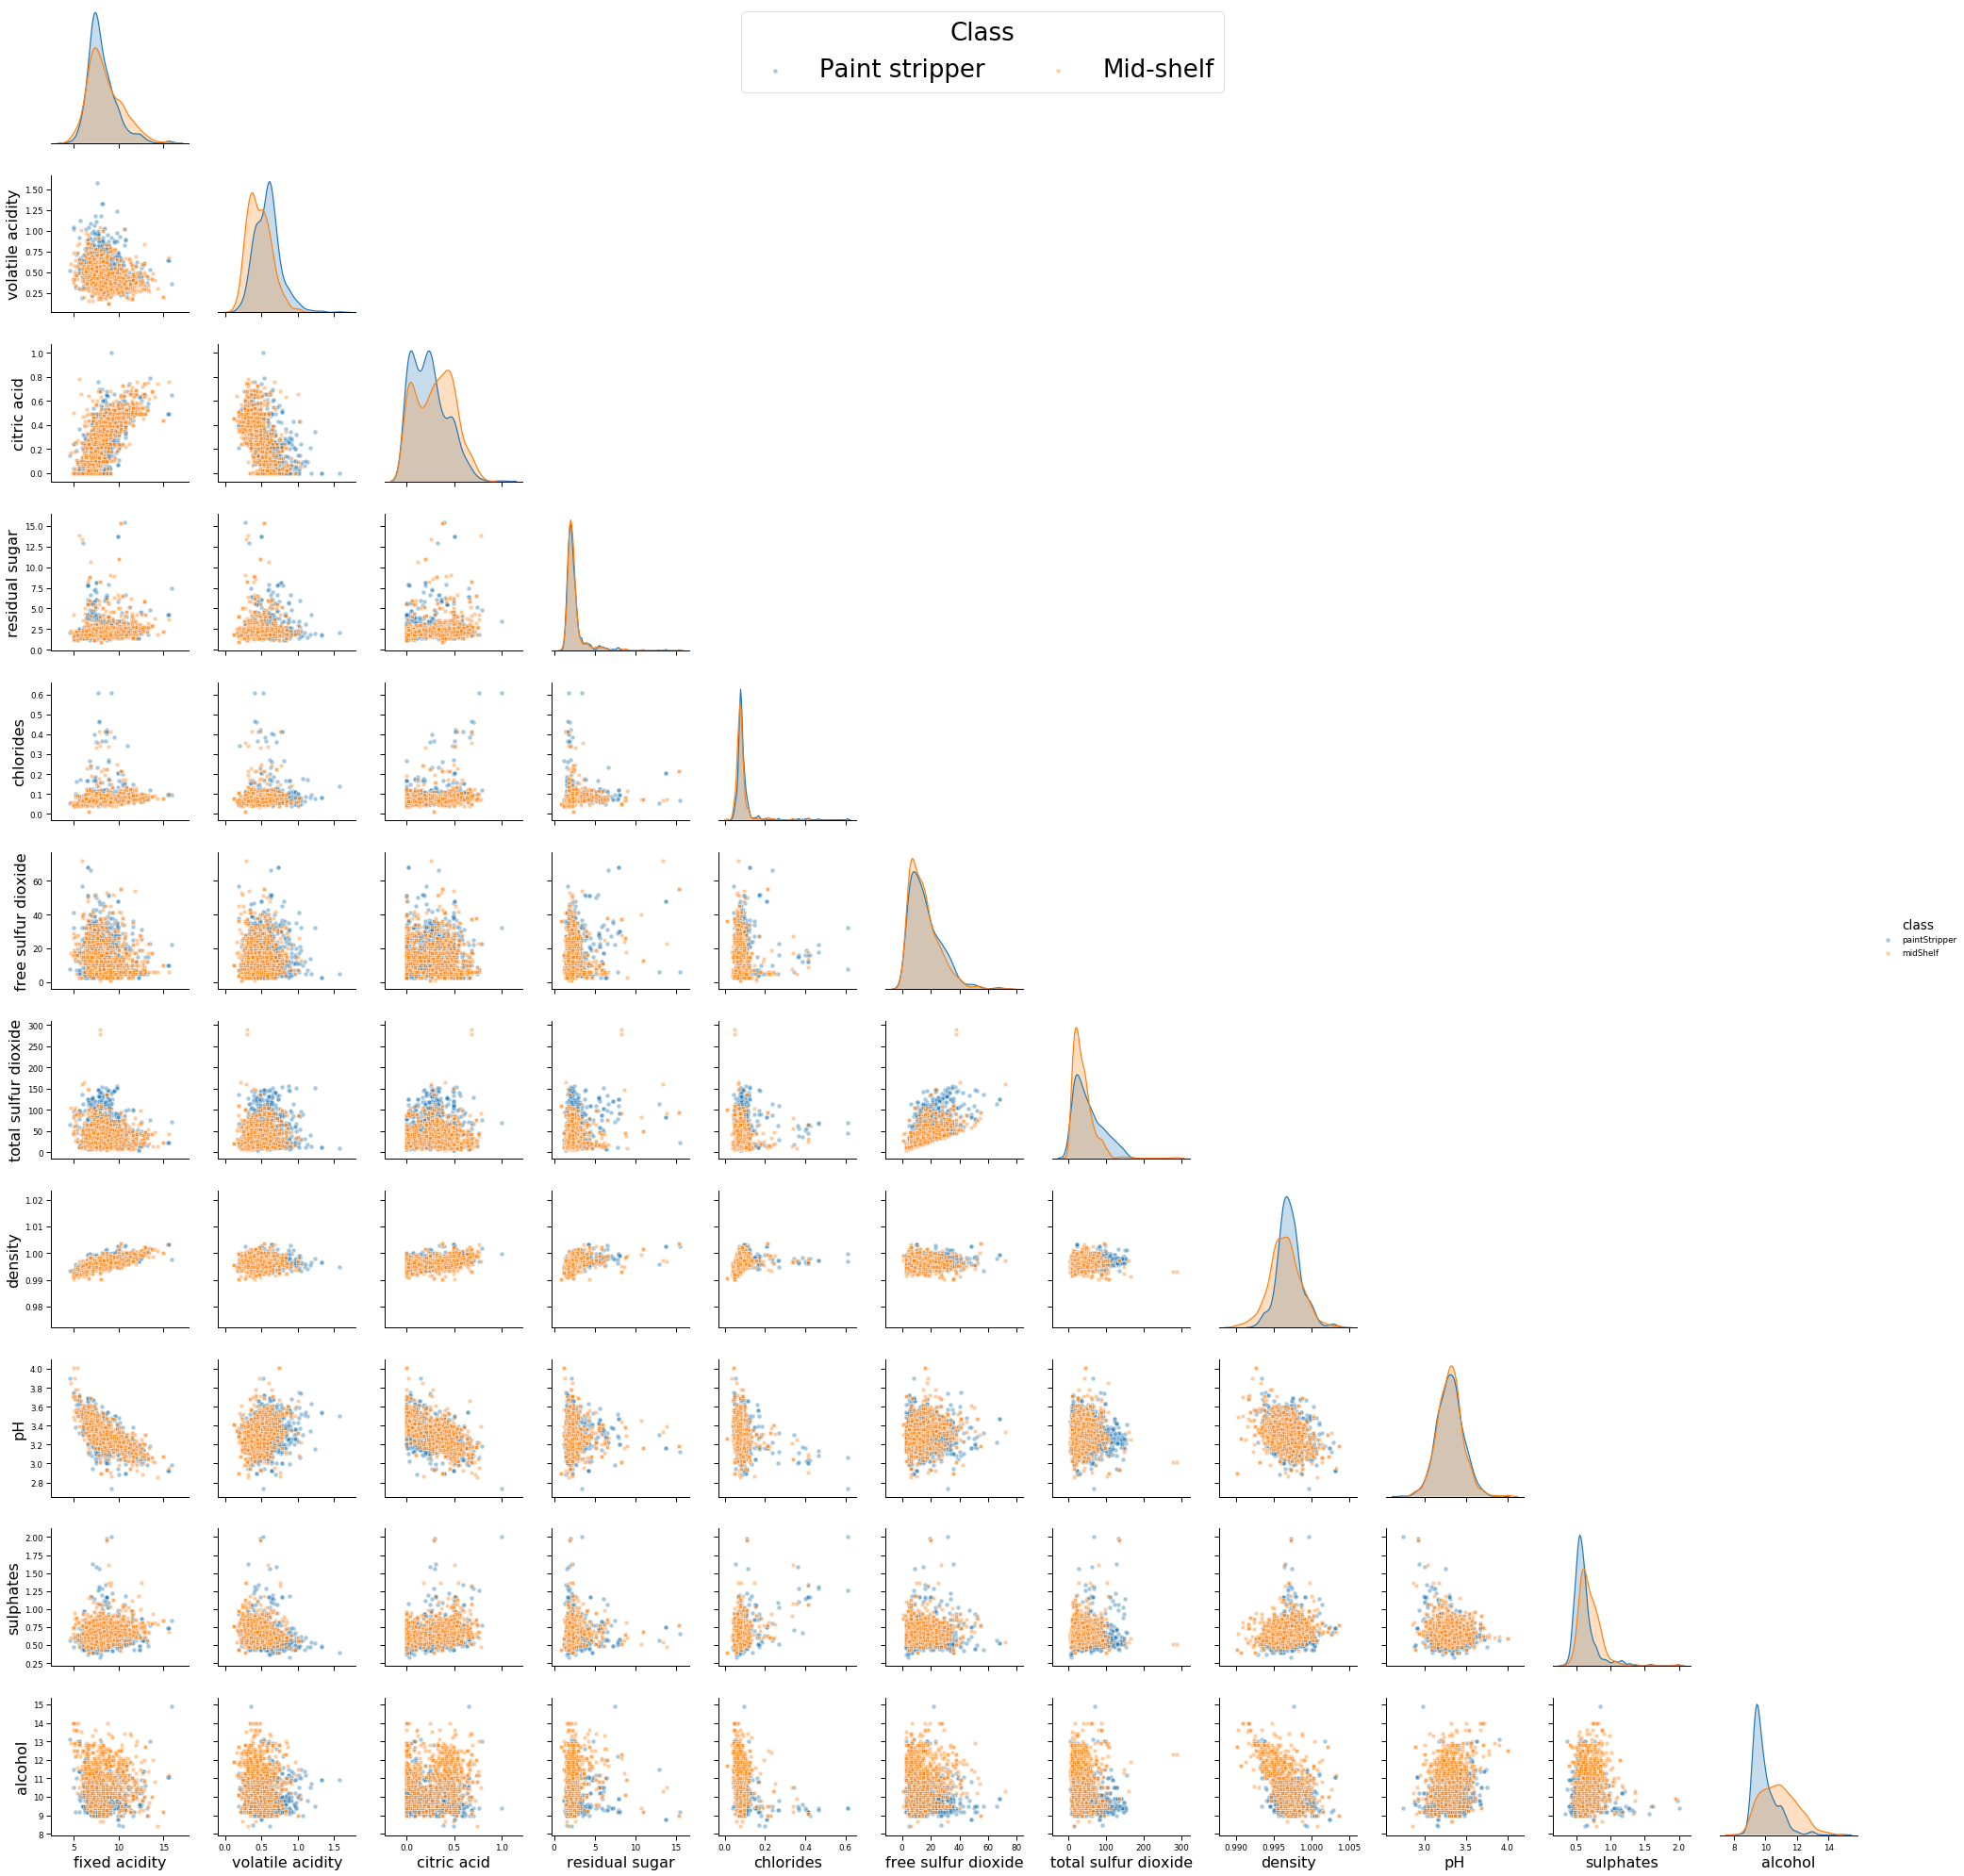

In [6]:
# let's take a look at the features

sns.set_context("paper", rc={"axes.labelsize":16})
g = sns.pairplot(df.drop(['quality', 'class_binary'], axis=1), kind='scatter', hue='class', markers=["o", "s"], corner=True,
            plot_kws={'alpha':0.4})
handles = g._legend_data.values()
g.fig.legend(fontsize = 26, title = 'Class', title_fontsize = 26, handles=handles, labels=['Paint stripper', 'Mid-shelf'], loc='upper center', ncol=2)
plt.show()

From this, we can see a few things:
1. There is a lot of overlap between the two classes, so let's set our expectations low for our classifier (we could consider dropping some features as well);
2. The decision boundaries appear to be not too complex, so in terms of polynomials, probably second order will be fine;
3. The features are at least normalish in their distributions, so we can apply standard scaling.

In [7]:
# let's create our higher order polynomials, then scale, then split the data ready for modelling

# split data into features and class labels
y = np.array(df['class_binary'])
X = np.array(df.drop(['quality', 'class', 'class_binary'], axis=1))

In [8]:
# add higher order polynomial features

poly_order = 2
poly = PolynomialFeatures(degree=poly_order)
X_poly = poly.fit_transform(X)

print(f'A second order polynomial has increased our number of features from 12 to {X_poly.shape[1]}, so be careful of overfitting.')

A second order polynomial has increased our number of features from 12 to 78, so be careful of overfitting.


In [9]:
# as a general rule, for any algorithm that uses gradient descent, we should scale the features. This helps the gradient descent algorithm minimise the cost function

# scale features: z = (x - u)/s, where x is a sample (data point), u and s are the mean and std of that feature, respectively 
scaler = StandardScaler()
X_std = scaler.fit_transform(X_poly)

In [10]:
# train/test split

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=66)
print(f'Training examples (m): {X_train.shape[0]};  test examples: {X_test.shape[0]}')

Training examples (m): 1119;  test examples: 480


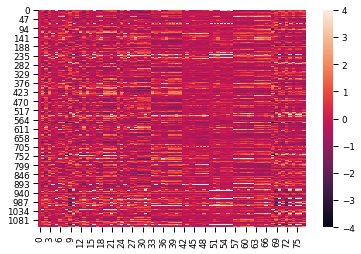

In [11]:
# double checking that all featuers are within a reasonable range

sns.heatmap(X_train, vmin=-4, vmax=4)
plt.show()

## Ready for modelling

At this stage, our training data has been transformed and scaled, and we are now ready to model. But instead of using Sci-kit learn packages, we'll build our own logistic regression classifier.